# 9. Data Visualization and Analysis

There are various reasons why I decided to add data analysis and visualization chapter to my final project:
- visualizations make it easier to identify patterns, trends, and outliers in the data that might not be apparent in raw data tables. This can lead to valuable insights into customer behavior, market trends, and other critical aspects.
- visualizations facilitate communication of findings to stakeholders who may not have a technical background, making it easier for them to grasp the key takeaways.
- Visualizations can help pinpoint areas of inefficiency, bottlenecks, or underperformance.
- Visualizations can be used to tell a compelling story about my project.

In [48]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


**NumPy** is a powerful library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.

**Pandas** is a data manipulation and analysis library for Python. It provides data structures like Series and DataFrame, which are essential for handling and analyzing structured data.

**Matplotlib** is a comprehensive library for creating static, animated, and interactive visualizations in Python. The pyplot module provides a MATLAB-like interface for making plots.

**Seaborn** is a statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn works well with Pandas data structures.

In [49]:
import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Exploratory data analysis (EDA)

### Summary statistics

### Authors

In [18]:
authors_gs = pd.read_csv('CSV/authors_gs.csv')

In [58]:
authors_gs

,authors_id,name,surname,gender,birth date,nationality,age,country
0,220,Luis,Velazquez,M,25/03/1956,Spanish,67,Spain
1,218,Sofia,Soto,F,18/06/1982,Aruba,41,Aruba
2,217,Roberto,Rodriguez,M,29/09/1972,Surinam,51,Suriname
3,216,Julia,Fernandez,F,13/02/1980,Guyane,43,Guyana
4,215,Laura,Mendez,F,07/12/1973,French Guiana,49,France Guiana
...,...,...,...,...,...,...,...,...
214,5,Lucas,Müller,M,07/06/1994,German,29,Germany
215,4,Elena,Kalashnikov,F,01/08/1988,Russian,35,Russia
216,3,Hiroshi,Tanaka,M,22/03/1975,Japanese,48,Japan
217,2,Maria,García,F,10/12/1991,Spanish,31,Spain


<hr>

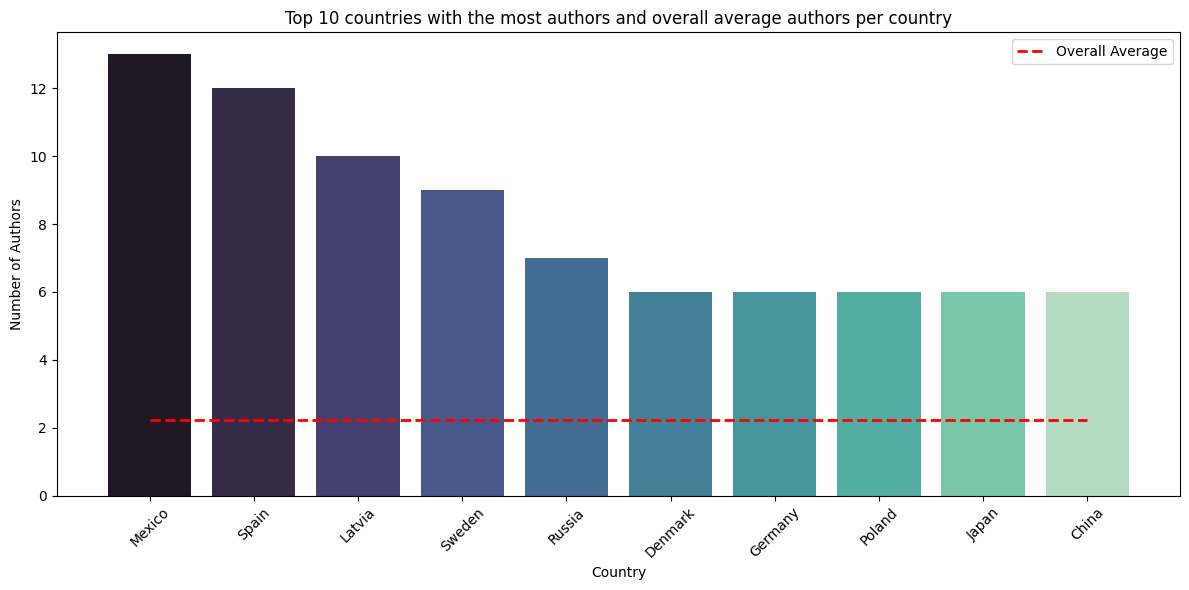

In [9]:
# Get the top 10 countries with the most authors and sort them by count in descending order
top_countries = authors_gs['country'].value_counts().head(10).index
df_top_countries = authors_gs[authors_gs['country'].isin(top_countries)]
df_top_countries_counts = df_top_countries['country'].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)

# Calculate the average number of authors per country
df_avg = authors_gs.groupby('country')['authors_id'].count().reset_index(name='average_count')
avg_all_countries = df_avg['average_count'].mean()

# Use Seaborn to create a bar plot with the 'mako' color palette
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='count', data=df_top_countries_counts, palette='mako')
sns.lineplot(x='country', y=avg_all_countries, data=df_top_countries_counts, color='red', linestyle='dashed', linewidth=2, label='Overall Average')

# Set plot labels and title
plt.xlabel('Country')
plt.ylabel('Number of Authors')
plt.title('Top 10 countries with the most authors and overall average authors per country')

# Show the plot with a legend
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.tight_layout()
plt.show()

In this visualization we can see the TOP 10 countries from which are Bookshop Near Me authors. First place is occupied by Mexico with total of 13 authors, followed by Spain with 12 and Latvia with 10. As we can see, half of the TOP 10 is sharing the same number of authors, whihch is 6. Overall in our database, avarage number of authors by country is shown with the red line, which indaicates 2 authors.

<hr>

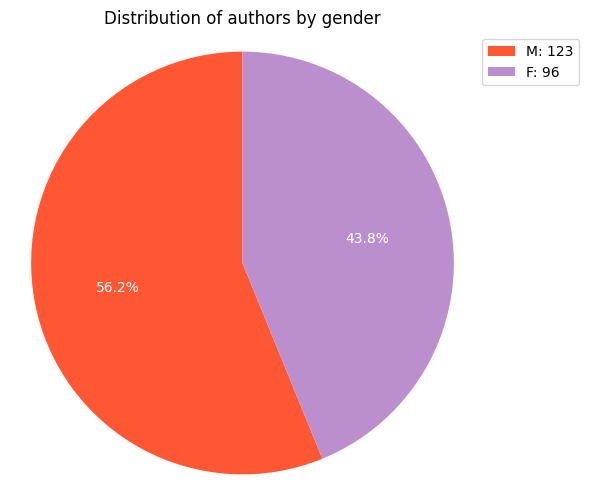

In [10]:
# Calculate the distribution of authors by gender
gender_distribution = authors_gs['gender'].value_counts()

# Plot a smaller pie chart with different colors
plt.figure(figsize=(6, 6))
colors = ['#FF5733', '#BB8FCE']  # Customize colors
wedges, texts, autotexts = plt.pie(gender_distribution, labels=None, autopct='%1.1f%%', startangle=90, colors=colors, textprops=dict(color="w"))

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Set title
plt.title('Distribution of authors by gender')

# Add legend with actual count of authors
plt.legend(gender_distribution.index + ': ' + gender_distribution.astype(str), loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

In this visualization we can see the distribution between Male and Female in the database. As we can see 56.2% of the authors are males (123 entities) and 43.8% are females (96 entities), which shows that there is a noticeable gender equality in Bookshop Near Me.

<hr>

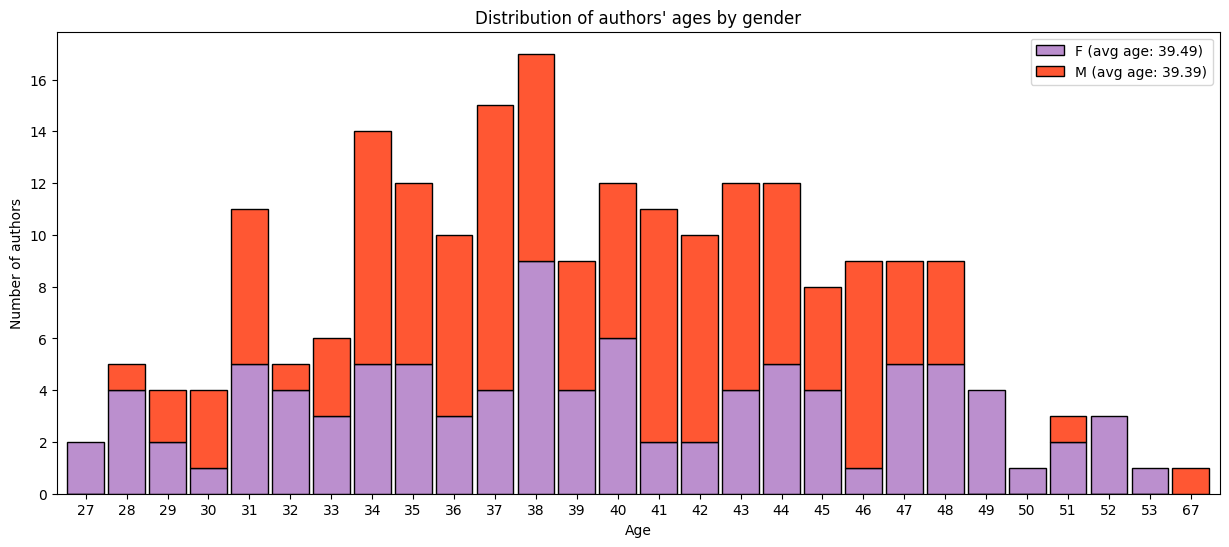

In [61]:
# Calculate the average age for each gender
avg_age_by_gender = authors_gs.groupby('gender')['age'].mean()

# Plot a stacked bar plot of authors' ages with counts of male (M) and female (F) authors
plt.figure(figsize=(15, 6))

# Create a DataFrame with counts of male and female authors for each age
gender_counts = authors_gs.groupby(['age', 'gender']).size().unstack(fill_value=0)
colors = {'F': '#BB8FCE', 'M': '#FF5733'}  # Custom colors for female and male

# Plot the stacked bar plot with custom colors
gender_counts.plot(kind='bar', stacked=True, width=0.9, color=[colors[col] for col in gender_counts.columns], edgecolor='black', ax=plt.gca())

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Number of authors')
plt.title('Distribution of authors\' ages by gender')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=0)

# Customize the legend with average age for each gender
legend_labels = [f'{col} (avg age: {avg_age_by_gender[col]:.2f})' for col in gender_counts.columns]
plt.legend(labels=legend_labels)

# Show the plot
plt.show()



In this visualization we can observe the gender distribution between author's age. As we can see the avarage age for males and as so for females is 39.

<hr>

### Books

In [62]:
books = pd.read_csv('CSV/book_analysis_view.csv')

In [64]:
books

,book_id,title,publication_date,stock_quantity,avarage_rating,price,genre_name,author_name,nationality
0,6,The Time Traveler's Diary,30/03/2022,34,4.6,97.37,Horror,Luisa Rodrigues,Portuguese
1,8,Whispers from Another Dimension,10/05/2022,25,4.6,52.23,Adventure,Sophie Dupont,French
2,15,Epic Adventures Beyond Time,28/04/2022,35,4.6,106.75,Travel,Chen Wei,Chinese
3,18,The Secrets of the Sphinx,15/03/2023,35,4.6,64.94,Poetry,Anastasia Papadopoulos,Greek
4,24,Realm of Dragons and Sorcery,15/09/2023,15,4.6,105.69,Science Fiction Fantasy,Sofia Ivanov,Russian
...,...,...,...,...,...,...,...,...,...
537,521,Unicorn Dreams,20/06/2023,60,2.0,15.09,Science,Sekou Toure,Guinean
538,522,Lilly of the Valley,01/12/2021,45,NaN,12.50,Historical Fiction,Zane Bērziņa,Latvian
539,523,One nightstand,13/02/2023,60,NaN,23.60,Poetry,Yuki Nakamura,Japanese
540,523,One nightstand,13/02/2023,60,NaN,23.60,Poetry,Isabella Davies,Fijian


<hr>

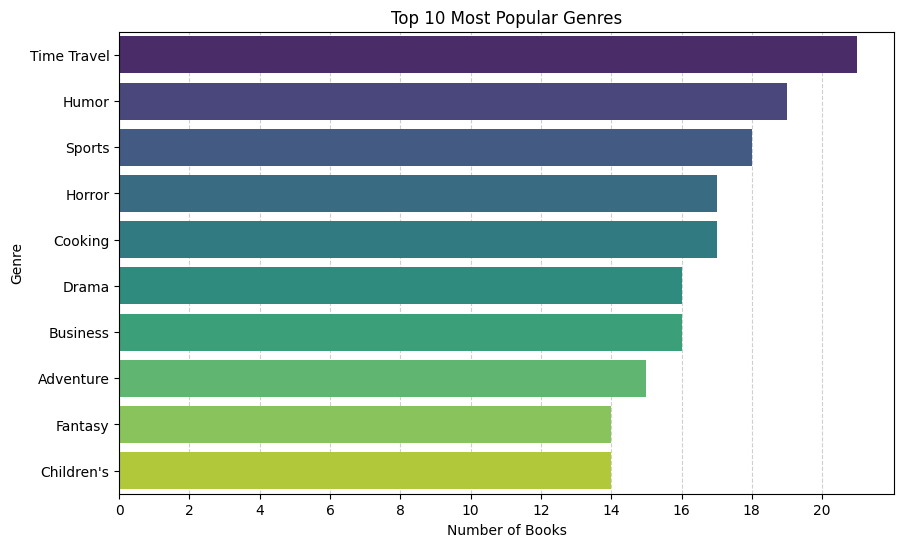

In [63]:
# Get the top 10 genres and their counts
top_genres = books['genre_name'].value_counts().head(10)

# Convert counts to integers
top_genres = top_genres.astype(int)

plt.figure(figsize=(10, 6))

# Set the bars with a lower zorder
ax = sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis', zorder=2)

plt.title('Top 10 Most Popular Genres')
plt.xlabel('Number of Books')
plt.ylabel('Genre')

# Manually set the tick locations on the x-axis
tick_interval = 2
plt.xticks(range(0, max(top_genres.values) + 1, tick_interval))

# Add a grid behind the bars
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)

plt.show()

In this visualization we can observe TOP 10 most popular book genres by count of books. As we can see, in these complicated times people really prefer reading time travle and humor genres, and as demographics are becoming worst - also children`s books are not really popular.

<hr>

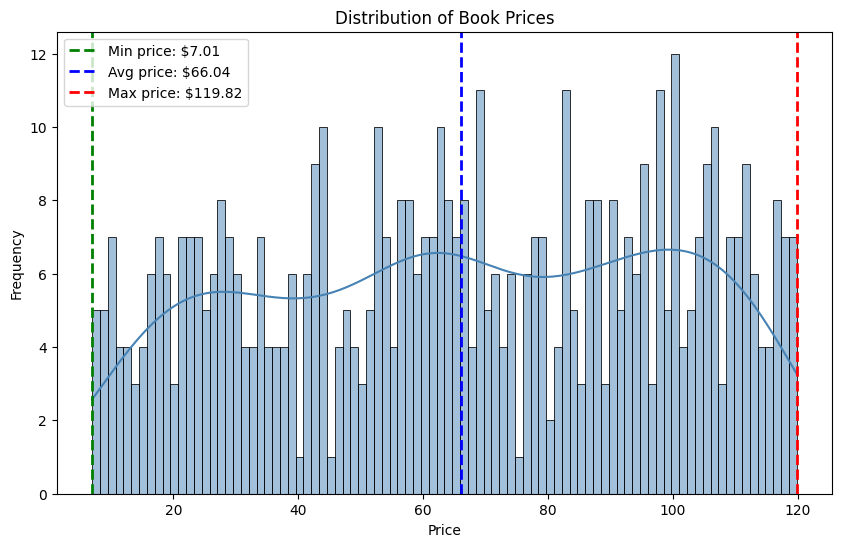

In [47]:
# Plot a histogram of book prices
plt.figure(figsize=(10, 6))
sns.histplot(book_a['price'], bins=90, kde=True, color='steelblue')
plt.title('Distribution of Book Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Calculate statistics
lowest_price = book_a['price'].min()
highest_price = book_a['price'].max()
average_price = book_a['price'].mean()

# Add lines for lowest, average, and highest prices
plt.axvline(lowest_price, color='green', linestyle='dashed', linewidth=2, label=f'Min price: ${lowest_price:.2f}')
plt.axvline(average_price, color='blue', linestyle='dashed', linewidth=2, label=f'Avg price: ${average_price:.2f}')
plt.axvline(highest_price, color='red', linestyle='dashed', linewidth=2, label=f'Max price: ${highest_price:.2f}')

plt.legend()
plt.show()


This visualization us gives an insight what a wide range of book prices Bookshop Near Me has. Starting from 7.01 as the lowest prices and ending with whooping 119.82 for the most expensive one. 66.04 founding itself as the avarage price for books in the database.

<hr>

In [71]:
tsb = pd.read_csv('CSV/top_selling_books.csv')

In [72]:
tsb

,book_id,title,avarage_rating,price,quantity_sold,total_paid,genre_name,author_name,nationality
0,1,The Starry Chronicles,4.5,54.08,55,2974.40,Science Fiction,John Smith,American
1,1,The Starry Chronicles,4.5,54.08,55,2974.40,Science Fiction,Matthias Schmidt,German
2,140,Policy Analysis: Decision-Making,4.2,66.55,41,2728.55,Science Fiction,Thabo Ndlovu,South African
3,147,Murder at Midnight,4.4,29.04,70,1974.72,Science Fiction,Naledi Mokoena,South African
4,147,Murder at Midnight,4.4,29.04,70,1974.72,Science Fiction,Ella White,Samoa
...,...,...,...,...,...,...,...,...,...
534,367,Digital Marketing Strategies,4.8,9.41,19,178.79,Steampunk,Giovanni Bianchi,Italian
535,377,Leadership Lessons from CEOs,4.6,91.35,51,4841.55,Steampunk,Pēteris Auziņš,Latvian
536,390,Leadership Excellence,4.7,84.66,59,4994.94,Steampunk,Helena Niemi,Finnish
537,393,Business Ethics and Social Responsibility,4.6,8.98,59,475.94,Steampunk,Javier Martinez,Costa Rica


<hr>

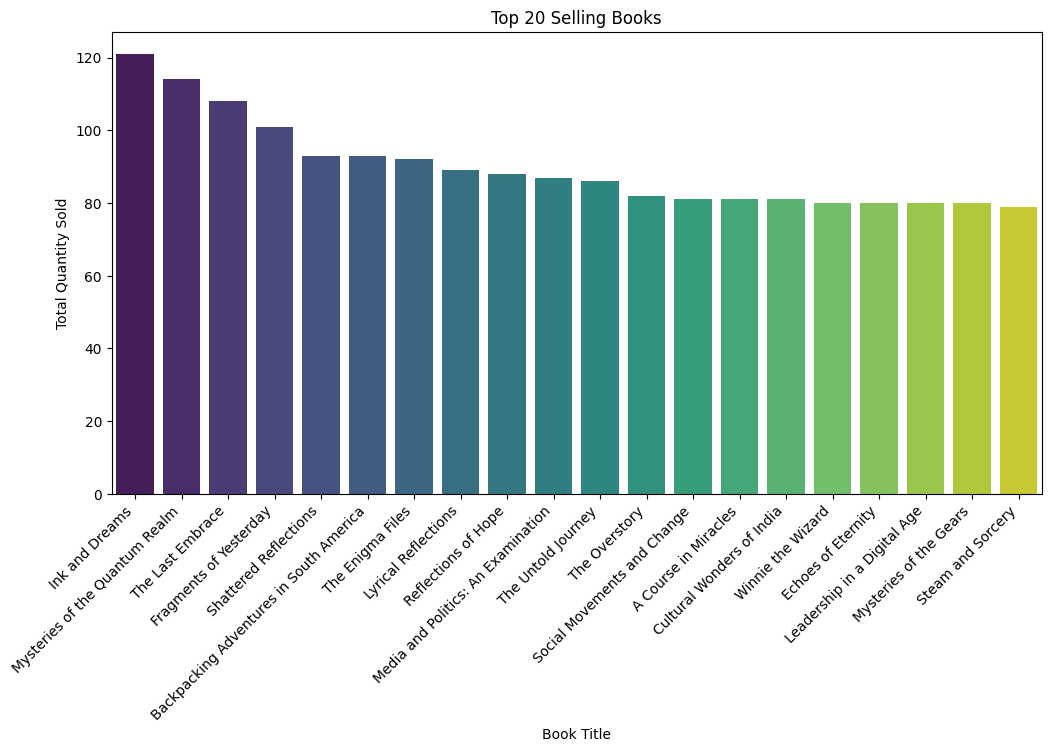

In [73]:
# Choose the top N books to display
top_n = 20  # You can adjust this number based on your preference

# Sort the DataFrame by quantity_sold in descending order
tsb = tsb.sort_values(by='quantity_sold', ascending=False)

# Plotting the bar chart for the top N books
plt.figure(figsize=(12, 6))
sns.barplot(x='title', y='quantity_sold', data=tsb.head(top_n), palette='viridis')
plt.title(f'Top {top_n} Selling Books')
plt.xlabel('Book Title')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()
